<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Activity/blob/main/Copy_of_Day_11_activity_students_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

# **Classification model because we have a yes or no prediction , we have to find out if the students will pass or fail **

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [9]:
# Read student data
data = pd.read_csv("student-data.csv")

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [10]:
# Calculate number of students
n_students = len(data)

In [11]:
# Calculate number of features
n_features = data.shape[1]

In [12]:
# Calculate passing students
n_passed =0
for i in data["passed"]:
  if i == "yes":
    n_passed+=1

In [13]:
# Calculate failing students
n_failed = 0
for i in data["passed"]:
  if i == "no":
    n_failed+=1

In [14]:
# Calculate graduation rate
grad_rate = data['passed'].value_counts(normalize=True) * 100

In [15]:
# Print the results
print("Total number of students :" , n_students)
print("no of featires: ",n_features)
print("Passed students :" ,n_passed)
print("No of students who failed : " ,n_failed)
print("% graduation :" , grad_rate)

Total number of students : 395
no of featires:  31
Passed students : 265
No of students who failed :  130
% graduation : yes    67.088608
no     32.911392
Name: passed, dtype: float64


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [16]:
# Extract feature columns

In [118]:
features = list(data.columns[:-1])
features

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [116]:
# Extract target column 'passed'

In [120]:
target = data.columns[-1]
target

'passed'

In [19]:
data["passed"]

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [20]:
# Separate the data into feature data and target data (X and y, respectively)

In [67]:
x = data.drop("passed", axis =1)
y = data["passed"]

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [68]:
x= pd.get_dummies(x , drop_first=True)

In [69]:
x.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [70]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.25 , random_state = 42)

In [71]:
# Show the results of the split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 39)
(99, 39)
(296,)
(99,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [26]:
#explaination
#1- We can use Logistic regression  , It is a model used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead,etc
#Logistic regression is easier to implement, interpret, and very efficient to train.
#Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
#The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

In [27]:
# 2-We can use Random forest as again our choice is a yes or no , random forst  reduces overfitting in decision trees and helps to improve the accuracy but
# It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 

In [28]:
# 3 -Service Vector Machine: Since we have a lot of features we can use SVM model.
#If we can see clear distance separable plane between two datasets, then it's a good idea to use SVM.
#Training is easy
#Non-traditional data like strings and trees can be used as input to SVM, instead of feature vectors.
#Limitation are :
#It does not work well with huge data. The algorithm will be very slow . Need to select a good kenel function. Model paremeters are difficult to interpret. Requires significant memory and processing prower.
#General application : Text classification , Image classification, Handwirting recognition

In [29]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.metrics import accuracy_score

In [30]:
# fit model-1  on traning data 

### **Logistic Regression**

In [31]:
logit_model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
# predict on the test data 

In [33]:
y_pred_logit = logit_model.predict(x_test)


In [34]:
# calculate the accuracy score

In [35]:
print("accuracy is :" , accuracy_score(y_test,y_pred_logit))

accuracy is : 0.696969696969697


### **KNN model**

In [36]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [37]:
#KNN model
acc_values = []
neighbors = np.arange(3,20,2)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k , metric = "minkowski")
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  acc= accuracy_score(y_test , y_pred_knn)
  acc_values.append(acc)

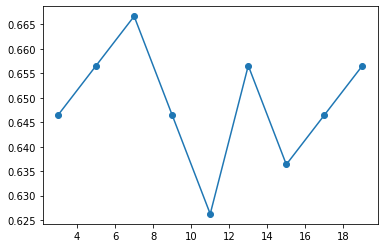

In [38]:
plt.plot(neighbors , acc_values ,"o-")

In [39]:
# we can see at 5 our accuracy is more
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski")
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
print("accuracy : " ,accuracy_score(y_test , y_pred_knn))


accuracy :  0.6565656565656566


### **Random Forest**

In [40]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [41]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

print("accuracy is :" , accuracy_score(y_test,y_pred_rf))

accuracy is : 0.6767676767676768


### **SVC**

In [45]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train,y_train)
y_predict_svm = svm_linear.predict(x_test)
print("accuracy is :" , accuracy_score(y_test,y_predict_svm))

accuracy is : 0.6868686868686869


### **Here we can see SVC and logistic regression has a better accuracy among the models . We can suggest Logistic regression  - Logistic regression is easier to implement, interpret, and very efficient to train.**

Lets try to improve our accuracy



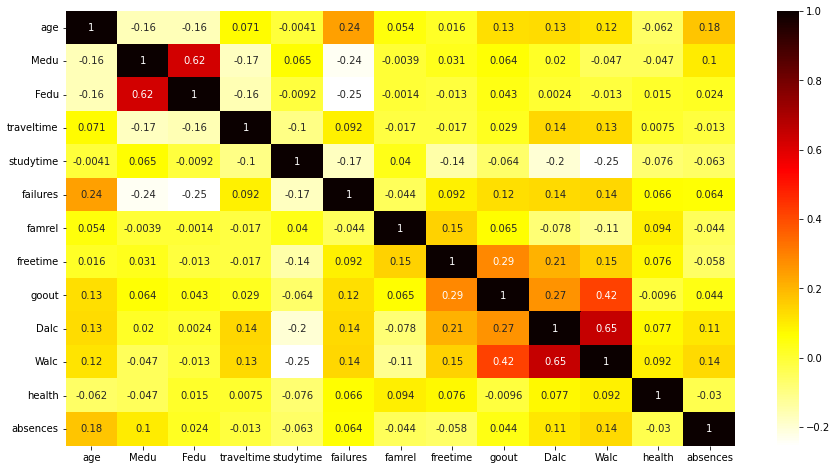

In [62]:
corrmatrix = data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix , annot =True , cmap ="hot_r")

In [88]:
data1 = data.drop("Medu" , axis =1)

In [89]:
data1 = data.drop("Dalc", axis =1)

In [91]:
x = data1.drop("passed" , axis=1)

In [92]:
y =data1["passed"]

In [93]:
x = pd.get_dummies(x ,drop_first=True)

In [95]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x =min_max.fit_transform(x)
x = pd.DataFrame(x)

In [96]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,0.5,0.080000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,0.5,0.053333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.50,0.5,0.133333,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,1.0,0.026667,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.25,1.0,0.053333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y , random_state=42 ,test_size=0.25)

In [99]:
x.shape

(395, 38)

In [102]:
x_train.shape

(296, 38)

In [103]:
x_test.shape

(99, 38)

In [104]:
y_train.shape

(296,)

In [105]:
y_test.shape

(99,)

In [107]:
from sklearn.linear_model import LogisticRegression
logit_model_p = LogisticRegression()
logit_model_p.fit(x_train,y_train)
u = logit_model_p.predict(x_test)
accuracy_score(y_test,u)

0.6767676767676768

In [109]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

print("accuracy is :" , accuracy_score(y_test,y_pred_rf))

accuracy is : 0.6767676767676768


In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.5353535353535354

### **We can see Logistic Regression gives better accuracy and our scaling did not improve our accuracy this time**